In [32]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

from sklearn.linear_model import LinearRegression as lm
import statsmodels.formula.api as sm
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans,DBSCAN

In [33]:
df_customer=pd.read_csv('movie_customer_spreadsheets.csv',engine='python')
df_customer.head()

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year
0,C5001,F,NC,51,50s,M,N,2014,Y,2015
1,C5002,M,CA,23,20s,S,N,2014,N,.
2,C5003,F,TX,39,30s,M,N,2014,N,.
3,C5004,F,TX,69,60s+,M,N,2014,N,.
4,C5005,F,SC,60,60s+,M,N,2014,N,.


In [34]:
df_download=pd.read_csv('movie_download_spreadsheets.csv',engine='python')
df_download.head()

,customer_id,item_id,down_year,down_date,weekday
0,C5001,I-1010,2014,02-21-2014,6
1,C5001,I-1014,2014,04-04-2014,6
2,C5001,I-1017,2014,01-19-2014,1
3,C5001,I-1028,2014,01-21-2014,3
4,C5001,I-1035,2014,03-11-2014,3


In [35]:
download_cnt = pd.DataFrame(df_download["customer_id"].value_counts())
download_cnt=download_cnt.sort_index()

download_cnt.head()

,customer_id
C5001,11
C5002,23
C5003,50
C5004,40
C5005,38


In [36]:
download_cus_id=download_cnt.set_index('customer_id')
download_cus_id

""
customer_id
11
23
50
40
38
50
50
42
3


In [37]:
download_cnt.index
# download_cnt의 인덱스를 customer_id로 인덱스 교체후 그 index값의 값을 불러옴
# 데이터 프레임에 인덱스값을 key로 다시 넣어주기 위해서임
download_cus_id=download_cnt.set_index('customer_id')
download_cus_id.index
# key=customer_id values= 각 고객별 다운로드 수를 데이터 프레임에 담음
download_count=pd.DataFrame({'customer_id':download_cnt.index,
                'download_cnt':download_cus_id.index})
download_count

,customer_id,download_cnt
0,C5001,11
1,C5002,23
2,C5003,50
3,C5004,40
4,C5005,38
5,C5006,50
6,C5007,50
7,C5008,42
8,C5009,3
9,C5010,27


In [38]:
merged_mv_cus=pd.merge(df_customer,download_count,on=['customer_id'],how='left')
merged_mv_cus

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,download_cnt
0,C5001,F,NC,51,50s,M,N,2014,Y,2015,11.0
1,C5002,M,CA,23,20s,S,N,2014,N,.,23.0
2,C5003,F,TX,39,30s,M,N,2014,N,.,50.0
3,C5004,F,TX,69,60s+,M,N,2014,N,.,40.0
4,C5005,F,SC,60,60s+,M,N,2014,N,.,38.0
5,C5006,F,CA,76,60s+,S,N,2014,N,.,50.0
6,C5007,F,FL,69,60s+,M,N,2014,N,.,50.0
7,C5008,M,GA,39,30s,M,Y,2014,N,.,42.0
8,C5009,M,VA,30,30s,M,Y,2014,Y,2015,3.0
9,C5010,M,TN,32,30s,M,N,2014,N,.,27.0


In [39]:
for i in range(len(merged_mv_cus)):
    if merged_mv_cus['gender'][i] == 'F':
        merged_mv_cus['gender'][i] = 0
    else:
        merged_mv_cus['gender'][i] =1

In [40]:
for i in range(len(merged_mv_cus)):
    if merged_mv_cus['married'][i] == 'S':
        merged_mv_cus['married'][i] = 0
    else:
        merged_mv_cus['married'][i] =1

In [41]:
for i in range(len(merged_mv_cus)):
    if merged_mv_cus['kids_under12'][i] == 'N':
        merged_mv_cus['kids_under12'][i] = 0
    else:
        merged_mv_cus['kids_under12'][i] =1

In [42]:
for i in range(len(merged_mv_cus)):
    if merged_mv_cus['drop_flag'][i] == 'N':
        merged_mv_cus['drop_flag'][i] = 0
    else:
        merged_mv_cus['drop_flag'][i] =1

In [43]:
merged_mv_cus

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,download_cnt
0,C5001,0,NC,51,50s,1,0,2014,1,2015,11.0
1,C5002,1,CA,23,20s,0,0,2014,0,.,23.0
2,C5003,0,TX,39,30s,1,0,2014,0,.,50.0
3,C5004,0,TX,69,60s+,1,0,2014,0,.,40.0
4,C5005,0,SC,60,60s+,1,0,2014,0,.,38.0
5,C5006,0,CA,76,60s+,0,0,2014,0,.,50.0
6,C5007,0,FL,69,60s+,1,0,2014,0,.,50.0
7,C5008,1,GA,39,30s,1,1,2014,0,.,42.0
8,C5009,1,VA,30,30s,1,1,2014,1,2015,3.0
9,C5010,1,TN,32,30s,1,0,2014,0,.,27.0


In [44]:
# 사용기간 파생변수로 만들어냄. drop_year와 register_year만 사용

for i in range(len(merged_mv_cus)):
    if merged_mv_cus['drop_year'][i]=='.':
        merged_mv_cus.loc[i, 'duration']= 2018 - int(merged_mv_cus['register_year'][i])
    else:
        merged_mv_cus.loc[i, 'duration']= int(merged_mv_cus['drop_year'][i]) - int(merged_mv_cus['register_year'][i])

In [45]:
merged_mv_cus['register_year'] = merged_mv_cus['register_year'].astype('int')

X=merged_mv_cus[['gender','age','married','kids_under12','register_year','drop_flag','duration']]
Y=merged_mv_cus['download_cnt']

In [46]:
df_cus_cluster1=pd.DataFrame(X)
df_cus_cluster2=pd.DataFrame(Y)
df_cus_cluster=df_cus_cluster1.join(df_cus_cluster2)
df_cus_cluster

# 범주형 자료들 최대한 수치화. state는 36개나 되서 일단 내비둠
# state나 age_group같은 무쓸모 변수들 제외

,gender,age,married,kids_under12,register_year,drop_flag,duration,download_cnt
0,0,51,1,0,2014,1,1.0,11.0
1,1,23,0,0,2014,0,4.0,23.0
2,0,39,1,0,2014,0,4.0,50.0
3,0,69,1,0,2014,0,4.0,40.0
4,0,60,1,0,2014,0,4.0,38.0
5,0,76,0,0,2014,0,4.0,50.0
6,0,69,1,0,2014,0,4.0,50.0
7,1,39,1,1,2014,0,4.0,42.0
8,1,30,1,1,2014,1,1.0,3.0
9,1,32,1,0,2014,0,4.0,27.0


In [47]:
# 위의 데이터들 스케일링. scaling할 변수가 너무 많으면 에러 날 때도 있음.

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_cus_cluster)
df_scaled[:5]

C:\Users\JinSoo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.

C:\Users\JinSoo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.



array([[-0.98998001,  0.28505473,  0.75013907, -0.73579364, -1.13808511,
         1.99315977, -0.83409319, -1.37644015],
       [ 1.0101214 , -1.38228012, -1.33308614, -0.73579364, -1.13808511,
        -0.50171592,  1.29632254, -0.32581133],
       [-0.98998001, -0.42951735,  0.75013907, -0.73579364, -1.13808511,
        -0.50171592,  1.29632254,  2.03810352],
       [-0.98998001,  1.35691284,  0.75013907, -0.73579364, -1.13808511,
        -0.50171592,  1.29632254,  1.1625795 ],
       [-0.98998001,  0.82098379,  0.75013907, -0.73579364, -1.13808511,
        -0.50171592,  1.29632254,  0.9874747 ]])

In [48]:
df_scaled_x=df_scaled[:,0:7]

In [49]:
z_ward=linkage(df_scaled_x,method='ward',metric='euclidean')

cluster_hie=fcluster(Z=z_ward, t=5, criterion='distance')
df_cus_cluster['ClusterHierarchical']=cluster_hie
df_cus_cluster.head()

n_cluster=25     ##내맘대로 군집 생성 개수
cluster_range = [i+1 for i in range(n_cluster)]
clus_error=[]
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_scaled_x)
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
ds_error=pd.DataFrame({'number of cluster':cluster_range, 'error':clus_error})
ds_error
### 여기선 25개까지 밖에 안했지만 실제론 군집수를 58개로 지정함. 자세한 설명은 다음에서.

,number of cluster,error
0,1,22939.000000
1,2,17706.942377
2,3,14734.880341
3,4,12419.783450
4,5,11065.835321
5,6,10125.910364
6,7,9258.471735
7,8,8553.405648
8,9,7773.633134
9,10,7233.826322


Text(0, 0.5, 'sum of sqaured distance')

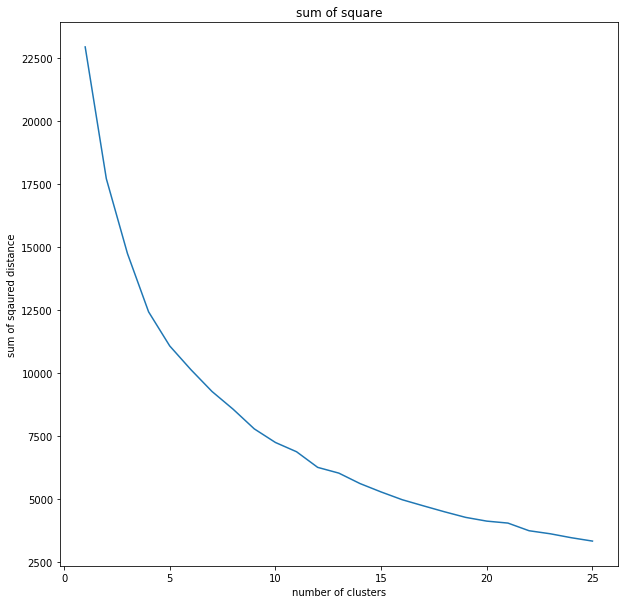

In [50]:
# 군집화 분산 정도의 그래프를 나타낸것. 그래프 라인이 평평해지는 지점을 선택하는 것이 바람직.
plt.figure(figsize=(10,10))
plt.plot(ds_error['number of cluster'],ds_error['error'])
plt.title('sum of square')
plt.xlabel('number of clusters')
plt.ylabel('sum of sqaured distance')

In [51]:
from sklearn.metrics import silhouette_score
n_clusters = range(2,60)
clusters_inertia = [] 
s_scores = []

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(df_scaled_x)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(df_scaled_x, KM_est.labels_)
    s_scores.append(silhouette_avg)

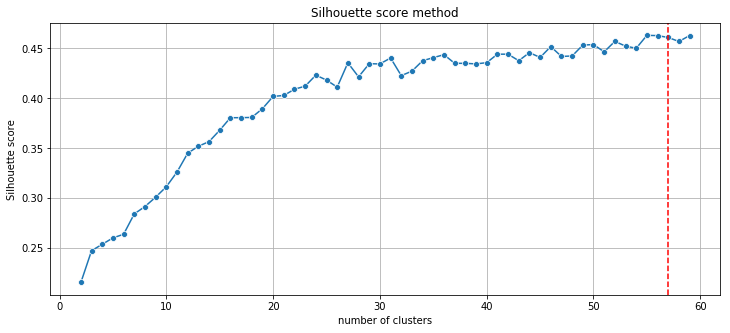

In [52]:
## 실루엣 계수가 가장 높을때가 군집이 가장 잘 된 지점
##군집수를 58개 지정했던 이유가 아래에 있는 실루엣 계수를 확인해본 결과였음

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(57, ls="--", c="red")
plt.grid()
plt.show()

In [53]:
# 군집계층을 만들어 준건데 이것도 수십여개로 만들어짐

clus=KMeans(57)
clus.fit(df_scaled_x)
cluster_kmeans=[i+1 for i in clus.labels_]
df_cus_cluster['clustr Kmeans']=cluster_kmeans
df_cus_cluster

,gender,age,married,kids_under12,register_year,drop_flag,duration,download_cnt,ClusterHierarchical,clustr Kmeans
0,0,51,1,0,2014,1,1.0,11.0,52,43
1,1,23,0,0,2014,0,4.0,23.0,31,39
2,0,39,1,0,2014,0,4.0,50.0,14,47
3,0,69,1,0,2014,0,4.0,40.0,15,36
4,0,60,1,0,2014,0,4.0,38.0,15,36
5,0,76,0,0,2014,0,4.0,50.0,27,56
6,0,69,1,0,2014,0,4.0,50.0,15,36
7,1,39,1,1,2014,0,4.0,42.0,5,17
8,1,30,1,1,2014,1,1.0,3.0,45,57
9,1,32,1,0,2014,0,4.0,27.0,18,24


In [55]:
## 여기선 밀도기반 군집분석입니다.
## 위의 kmeans 군집분석에 비해 초기 k값은 설정해주지 못하지만 밀도기반이라 성능은 더 좋음

db = DBSCAN(eps=0.3, min_samples=10)

db.fit(df_scaled_x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present. 이라고 합니다.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 59


In [56]:
### cluster kmeans와 cluster DBSCAN이라는 변수를 만들어 각 군집에 번호를 붙여준것
### labels라는 변수에 1을 더해준것이 cluster DBSCAN 변수입니다.

db.fit(df_scaled_x)
labels_db=db.labels_

for (i,val) in enumerate(labels_db):
    if val<0:
        labels_db[i]=0
    else:
        labels_db[i]=labels_db[i]+1

df_cus_cluster['cluster DBSCAN']=labels_db
df_cus_cluster

,gender,age,married,kids_under12,register_year,drop_flag,duration,download_cnt,ClusterHierarchical,clustr Kmeans,labels,cluster DBSCAN
0,0,51,1,0,2014,1,1.0,11.0,52,43,6,7
1,1,23,0,0,2014,0,4.0,23.0,31,39,0,1
2,0,39,1,0,2014,0,4.0,50.0,14,47,1,2
3,0,69,1,0,2014,0,4.0,40.0,15,36,1,2
4,0,60,1,0,2014,0,4.0,38.0,15,36,1,2
5,0,76,0,0,2014,0,4.0,50.0,27,56,2,3
6,0,69,1,0,2014,0,4.0,50.0,15,36,1,2
7,1,39,1,1,2014,0,4.0,42.0,5,17,3,4
8,1,30,1,1,2014,1,1.0,3.0,45,57,-1,0
9,1,32,1,0,2014,0,4.0,27.0,18,24,4,5


In [57]:
labels_db

array([ 7,  1,  2, ...,  0,  0, 57], dtype=int64)

In [61]:
#### plotly 패키지 다운로드 필요함!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
### k_means clustering
### age, download_cnt, duration에 따른 그래프고 x,y,z 변수는 바꿀 수 있음

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

clus_labels = clus.labels_
centroids = clus.cluster_centers_

df_cus_cluster['labels']=clus_labels
trace1=go.Scatter3d(
    x=df_cus_cluster['age'],
    y=df_cus_cluster['download_cnt'],
    z=df_cus_cluster['duration'],
    mode='markers',
    marker=dict(
        color=clus_labels,
        size=2,
        line=dict(
            color=clus_labels,
            width=12
        ),
        opacity=0.8
    )
)

graph_3d=[trace1]

layout = go.Layout(
    title = 'customer clustering',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'download_cnt'),
            zaxis = dict(title  = 'duration')
        )
)

fig = go.Figure(data = graph_3d, layout = layout)
py.iplot(fig)

In [60]:
# dbscan clustering

df_cus_cluster['labels']=labels_db
trace2=go.Scatter3d(
    x=df_cus_cluster['age'],
    y=df_cus_cluster['download_cnt'],
    z=df_cus_cluster['duration'],
    mode='markers',
    marker=dict(
        color=labels_db,
        size=2,
        line=dict(
            color=labels_db,
            width=12
        ),
        opacity=0.8
    )
)

graph_3d=[trace2]

layout2 = go.Layout(
    title = 'customer clustering',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'download_cnt'),
            zaxis = dict(title  = 'duration')
        )
)

fig = go.Figure(data = graph_3d, layout = layout2)
py.iplot(fig)